# Notebook Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'


TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'


VOCAB_SIZE=2500

# Load the Data  

In [3]:
#Features

X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter = ' ')
#Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter = ' ')
#Tken Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter = ' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter = ' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter = ' ')

In [4]:
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       [5., 1., 2., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.]])

# Calculating the Joint Probability 

The Dot Product

In [5]:
a = np.array([1,2,3])
b = np.array([0,5,4])

print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [6]:
a.dot(b)

22

In [7]:
(1 * 0 )+ (2*5) + (3*4)

22

In [8]:
c = np.array([[0,6],[3,0],[5,1]])
print('shape of c is', c.shape)
print(c)

shape of c is (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [9]:
print(a.dot(c))

[21  9]


In [10]:
print('shape of the dot product is', a.dot(c).shape)

shape of the dot product is (2,)


In [11]:
[1*0 +2*3 +3*5, 1*6 + 2*0 +3*1]

[21, 9]

In [12]:
X_test.shape

(1723, 2500)

In [13]:
prob_token_spam.shape

(2500,)

In [14]:
print('shape of the dot product is ', X_test.dot(prob_token_spam).shape)

shape of the dot product is  (1723,)


In [15]:
#a Prior is a gues/belief of something 

# Set the Prior 

$$P(Spam \, | \, X) = \frac{P(X\, | \, Spam \,) \, P(Spam)} {P(X)} $$

In [16]:
PROB_SPAM = 0.3116

# Joint probability in log format

In [17]:
## in this calc, we are going to combine the joint prob and the conditional probability.
## Calc the probability that the email is spam given the tokens 

In [18]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [50]:
type(joint_log_spam)

numpy.ndarray

###$$P(ham \, | \, X) = \frac{P(X\, | \, ham \,) \, 1-P(spam)} {P(X)} $$

In [20]:
joint_log_ham= X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [21]:
joint_log_ham[:5]

array([-11.08501777, -40.14248227, -38.49670323,  -2.88961423,
       -60.66144555])

In [22]:
joint_log_ham.size

1723

# Making predictions
### Checking for higher joint probaility 

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$ 
<center> **OR** </center> 
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [23]:
prediction = joint_log_spam > joint_log_ham

In [24]:
prediction [-5:]

array([False, False, False, False, False])

In [25]:
##above means all 5 are non spam 

In [26]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

In [27]:
##which is correct from the y_test data 

### Simplify

$$P(X \, | \, Spam) \, P(Spam) ≠ \frac{P(X\, | \, Spam) \, P(Spam)} {P(X)} $$

In [28]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham= X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

In [29]:
##the above is. a valid but simplifed version of the previously used 

type(joint_log_spam)

numpy.ndarray

# Metrics and Evaluation 
## Accuracy of the model 

In [30]:
correct_doc = (y_test == prediction).sum()
numbs_doc_wrong = X_test.shape[0] - correct_doc

print('Docs classified correctly', correct_doc)
print('Docs classified incorrectly', numbs_doc_wrong)

Docs classified correctly 1673
Docs classified incorrectly 50


In [31]:
## Accuracy 
correct_doc/len(X_test)

0.9709808473592572

In [32]:
fraction_wrong = numbs_doc_wrong /len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Fraction classified correclt is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.90%
Fraction classified correclt is 97.10%


# Visualising the results 

In [33]:
#Chart styling info 
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop = 1, num=1000)

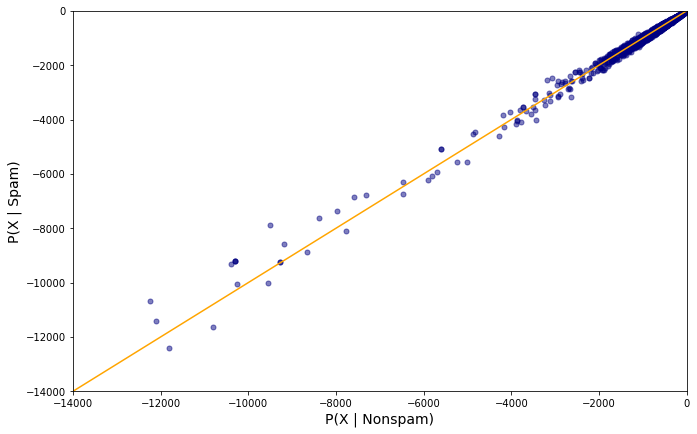

In [34]:
plt.figure(figsize = (11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set the scale
plt.xlim([-14000, 1])
plt.ylim((-14000, 1))


plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color = 'orange')
plt.show()

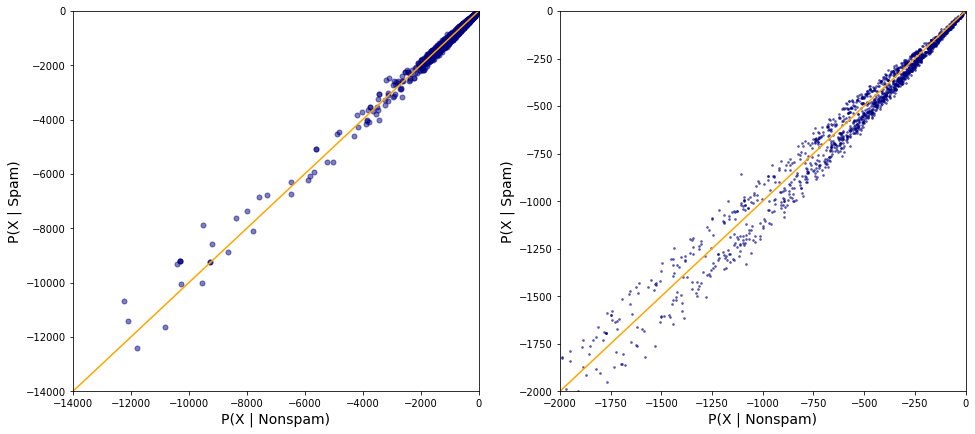

In [35]:
plt.figure(figsize = (16, 7))

#subplot
#Chart Nr 1: 
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set the scale
plt.xlim([-14000, 1])
plt.ylim((-14000, 1))

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color = 'orange')

#Chart Nr 2: 
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set the scale
plt.xlim([-2000, 1])
plt.ylim((-2000, 1))

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color = 'orange')





plt.show()

In [36]:
##using seaborn over plot lib, as its easier to make charts clear and coloured etc. 
##chart style 

sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label:joint_log_ham, 
                          labels: y_test})

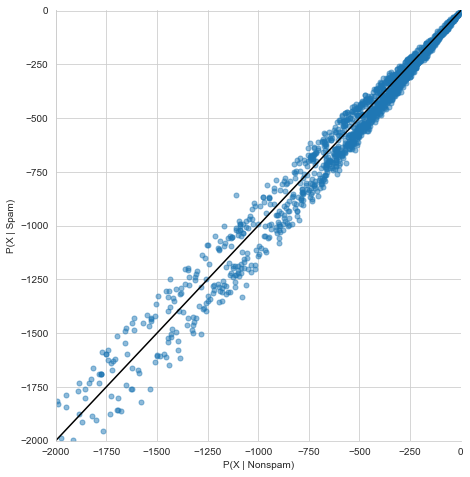

In [37]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height = 6.5, fit_reg = False,
          scatter_kws = {'alpha':0.5, 's':25})

plt.xlim([-2000,1])
plt.ylim([-2000,1])

#decision boundary 
plt.plot(linedata, linedata, color='black')

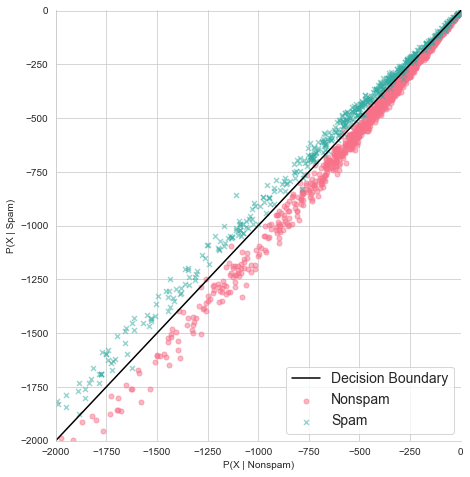

In [38]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height = 6.5, fit_reg = False,legend=False,
          scatter_kws = {'alpha':0.5, 's':25}, hue = labels, markers = ['o', 'x'], palette = 'husl')

plt.xlim([-2000,1])
plt.ylim([-2000,1])

#decision boundary 
plt.plot(linedata, linedata, color='black')


plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

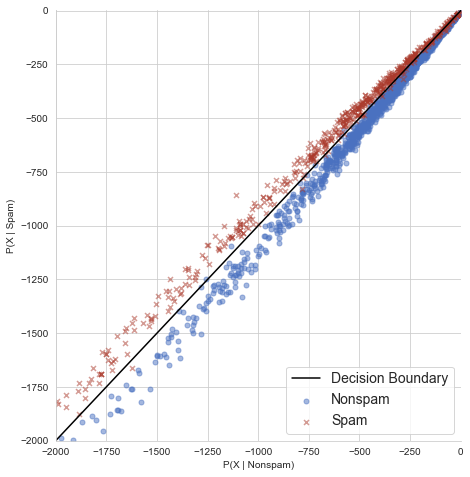

In [39]:
##for custom colours
mycolours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height = 6.5, fit_reg = False,legend=False,
          scatter_kws = {'alpha':0.5, 's':25}, hue = labels, markers = ['o', 'x'], palette = mycolours)

plt.xlim([-2000,1])
plt.ylim([-2000,1])

#decision boundary 
plt.plot(linedata, linedata, color='black')


plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

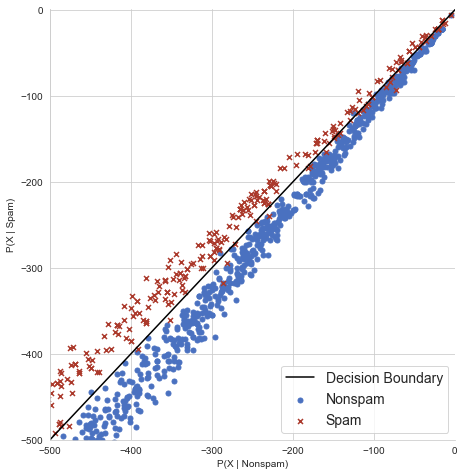

In [40]:
##for custom colours && zoom in 
mycolours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height = 6.5, fit_reg = False,legend=False,
          scatter_kws = {'alpha':1, 's':25}, hue = labels, markers = ['o', 'x'], palette = mycolours)

plt.xlim([-500,1])
plt.ylim([-500,1])

#decision boundary 
plt.plot(linedata, linedata, color='black')


plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

False Positives and False Negatives 

In [41]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1167,  556]))

In [42]:
true_pos = (y_test == 1) & (prediction == 1)

In [43]:
true_pos.sum()

547

In [44]:
false_pos = (y_test ==0) & (prediction ==1) 
false_pos.sum()

9

In [45]:
false_neg = (y_test ==1) & (prediction ==0)
false_neg.sum()

41

# Recall Score- the sentitivity 
recalls is the (True Positions) /(( true Positive) + (False Neg)) 


In [46]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.3}'.format(recall_score))

Recall score is 0.93


# Precision metric 
precision = (True Positive) / (True Pos + False Pos) 

In [47]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())

In [48]:
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.984


# F score or F1 SCore - the harmonic mean 
2 x ((Precision x Recall) / Precision + Recall )

In [49]:
f1_score = 2 * (precision_score *recall_score)/ (precision_score +recall_score)
print('F1 Score is {:.3}'.format(f1_score))

F1 Score is 0.956
